**Supermarket-Sales-Data-Analysis**

The growth of supermarkets in city are increasing and everyone is prefering to buy from supermarkets, and market competitions are also high.

This Dataset is one of the trend and growing supermarket in major city's, It is located in 3 different locations, This recorded has 3 Months data for 3 Branches.

**Libraries used**


*   Numpy 
*   Pandas   #for reading files, and data processing

*   Seaborn & Matplotlib   #for data plotting


**Purpose**

This data analysis is used for several purposes like
business expansion, focusing on products, etc. 






In [1]:
import numpy as np  #import numpy
import pandas as pd #import  pandas
import seaborn as sns #import seaborn
import matplotlib.pyplot as plt #import matplotlib with pyplot

In [2]:
Sales=pd.read_excel("Python_mandatory_project_supermarket_sales (1).xlsx")  #reading excel file
Category=pd.read_excel("Python_mandatory_project_supermarket_sales (1).xlsx","product Mapping") #reading excel file
City=pd.read_excel("Python_mandatory_project_supermarket_sales (1).xlsx","CITY Mapping")  #reading excel file

In [3]:
Sales=Sales.merge(Category,on='Product code',how='outer') #merging Category sheet to mail sheet for product names

In [7]:
Sales['City']=Sales['Branch'].replace({'A':'Yangon','B':'Mandalay','C':'Naypyitaw'})  #adding column with City name from Branch

In [8]:
Sales.head()

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Product line,City
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Health and beauty,Yangon
1,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Health and beauty,Yangon
2,665-32-9167,A,CT1,Member,Female,PD1,-,2,3.6260,76.1460,2019-01-10,17:15:00,Credit card,72.52,4.761905,3.6260,7.2,Health and beauty,Yangon
3,829-34-3910,A,CT1,Normal,Female,PD1,71.38,10,35.6900,749.4900,2019-03-29,19:21:00,Cash,713.80,4.761905,35.6900,5.7,Health and beauty,Yangon
4,656-95-9349,A,CT1,Member,Female,PD1,68.93,7,24.1255,506.6355,2019-03-11,11:03:00,Credit card,482.51,4.761905,24.1255,4.6,Health and beauty,Yangon


In [11]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               996 non-null    object        
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [12]:
print(f'Number of columns : {Sales.shape[1]} | Number of rows : {Sales.shape[0]}') #To check columns and rows info

Number of columns : 19 | Number of rows : 1000


In [15]:
Sales.isnull().sum()

Invoice ID                 0
Branch                     0
city code                  0
Customer type              0
Gender                     0
Product code               0
Unit price                 4
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     7
Product line               0
City                       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


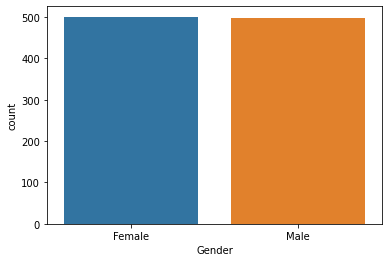

In [ ]:
#Is your supermarket more popular with males or females? 

Sales.Gender.value_counts() #counting number of customer according to Gender
sns.countplot(Sales['Gender'])

**Sales is similar for both Male and Female, though as per customers females are slightly spending more.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customers Ratings')

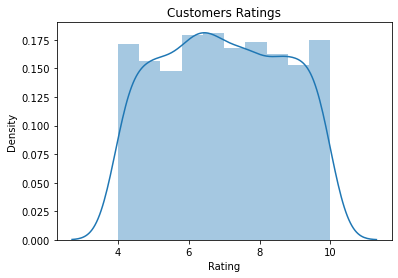

In [ ]:
#What does the customer rating look like and can you also comment on its distribution? 

Sales.Rating.value_counts() #counting number of Ratings given by customers 
sns.distplot(Sales['Rating']) #by distplot making plot with rating
plt.title('Customers Ratings') #adding titile to plot

**The customer rating is looks uniform, Higher customers gave 6 to 8 rating.**

       Quantity
            sum
Branch         
A          1859
B          1820
C          1831


Text(0.5, 1.0, 'Sales with branches')

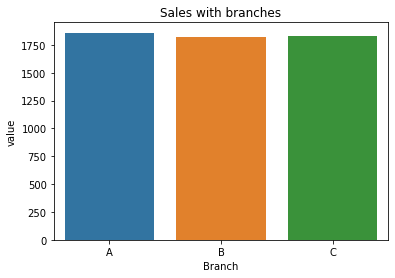

In [ ]:
#What can you say about the aggregate sales across the branches? 

sns.barplot(x='Branch',y='Quantity',data=Sales) #making barplot with Branch column and quantity
p=Sales.groupby(Sales['Branch']).agg({'Quantity':["sum"]}) #aggregating Quantity column as sum
print(p)
q=p.reset_index()   #reset the index to default
r=q.melt(id_vars='Branch')  
sales1=sns.barplot(x='Branch',y='value',data=r)  #counting sales according to branches
plt.title('Sales with branches') #adding title

**There is not much difference in sales across the branches, the sales in branch A is bit higher than rest.**

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


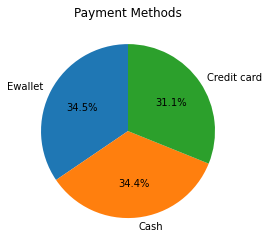

In [ ]:
#Which is the most popular payment method used by customers?


total=Sales['Payment'].value_counts() #counting  and storing total sales
total
methods=['Ewallet','Cash','Credit card']  #defining payment methods
plt.pie(total,labels=methods,autopct='%1.1f%%',startangle=90) #making pie chart using payment methods
plt.title('Payment Methods')  #adding title to pie chart
print(total)  

**The most popular method used by customers is Ewallet with 34.5% and Credit card method is not used much, Cash method also popular with 34.4%.**

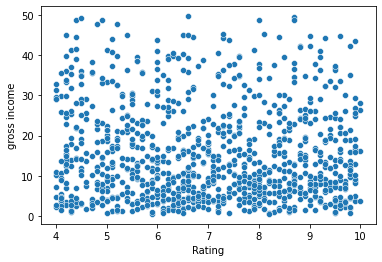

In [ ]:
#Does gross income affect customer ratings? 

sns.scatterplot(x='Rating',y='gross income',data=Sales) #making scatterplot

**As we can there is no relationship between gross income with their Rating**

Text(0.5, 1.0, 'gross income with branches')

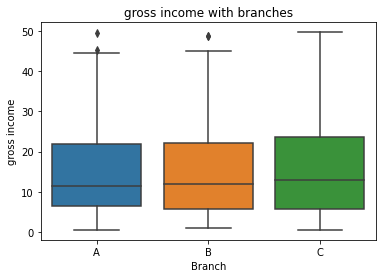

In [ ]:
#Which is the most profitable branch? 

sns.boxplot(x='Branch',y='gross income',data=Sales) #making boxplot for gross income with Branches
plt.title('gross income with branches') #adding title to plot

**There is not much difference between branches, as we can see branch C has a slightly higher income than branch A and B.**

Text(0.5, 1.0, 'gross income with gender')

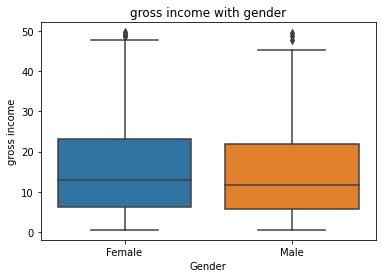

In [ ]:
#Create a boxplot between Gender and Gross income and explain the results?

sns.boxplot(x='Gender',y='gross income',data=Sales) #making boxplot for gross income with gender
plt.title('gross income with gender') #adding title to plot

**Gross income is similar for both male and female, though Female spends bit higher than male.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'gross income with Date')

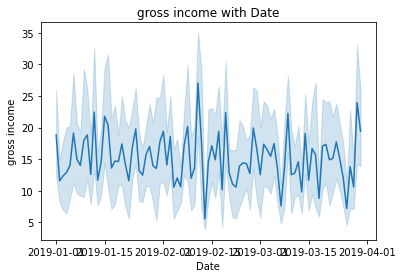

In [ ]:
#Can you see any time trend in gross income? 


sns.lineplot(Sales['Date'],Sales['gross income']) #making lineplot for gross income with date
plt.title('gross income with Date')

**There is no particular time trend is observed, Sometimes gross income is high and low, Overall it's remains at a certain average level.**

Text(0.5, 1.0, 'Sales by Gender')

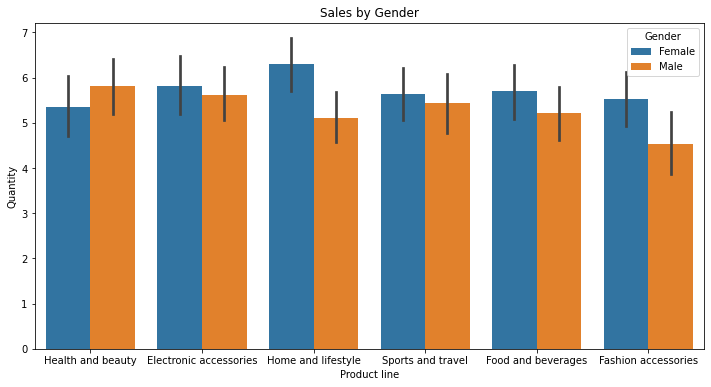

In [ ]:
#What is the spending pattern of both males and females, meaning in which category do they spend more? 

plt.figure(figsize=(12,6))  #defining size of plot
sns.barplot(x='Product line',y='Quantity',hue='Gender',data=Sales) #making barplot for product line comparing genders
plt.title('Sales by Gender')  #adding title to plot

**As we can see in plot Female spend more on 'Home and lifestyle', Males spend more on 'Health and beauty'.**

Text(0, 0.5, 'Customers')

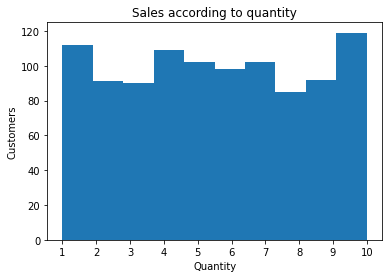

In [ ]:
#How many products are bought by customers? 

Distribution=[1,2,3,4,5,6,7,8,9,10] #defining ticks for x axis
plt.hist(Sales['Quantity']) #making histogram plot with quantity
plt.xticks(Distribution)  #declaring x axis ticks
plt.title('Sales according to quantity')  #adding title
plt.xlabel('Quantity')  #adding x axis name
plt.ylabel('Customers') #adding y axis name

**Most of the customers bought 10 Quantities.**

Text(0, 0.5, 'Quantity')

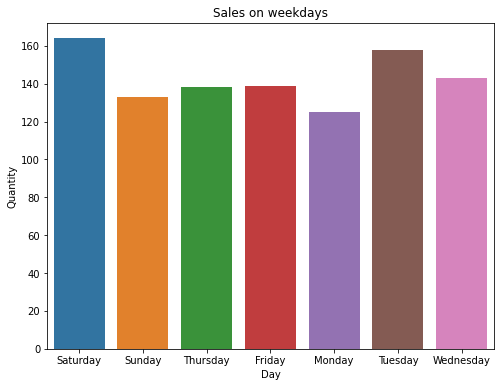

In [ ]:
#Which day of the week has maximum sales? 

Sales['Day']=Sales['Date'].dt.day_name()  #creating dayname from Day column and storing in storing in another column
plt.figure(figsize=(8,6)) #difining plot size
sns.countplot(x='Day',data=Sales) #making countplot for Day with sales count
plt.title('Sales on weekdays')  #adding title
plt.ylabel('Quantity')  #adding y axis name

**Sales is highest on Saturday because of it is the weekend, and the Monday is the lowest sales.**

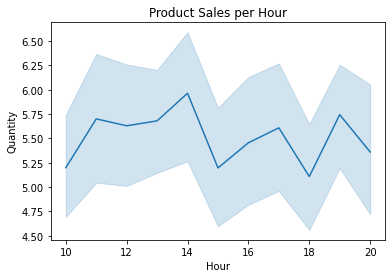

In [ ]:
#Which hour of the day is busiest?
Sales['Hour'] = pd.to_datetime(Sales['Time'],format='%H:%M:%S').dt.hour # to get hours from the time
sns.lineplot(x="Hour", y = 'Quantity', data =Sales).set_title("Product Sales per Hour") # line plot to know hour of the day is busiest
plt.show()

**At 14th hour peak is there (2PM of the day).**


([<matplotlib.axis.XTick at 0x7f9a94801990>,
 <a list of 11 Text major ticklabel objects>)

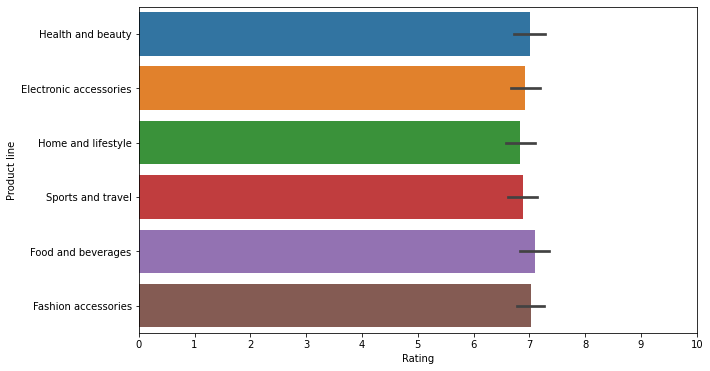

In [ ]:
#Which product line should your supermarket focus on? 

Distribution=[0,1,2,3,4,5,6,7,8,9,10] #x axis ticks
plt.figure(figsize=(10,6))  #defining plot size
sns.barplot(x='Rating',y='Product line',data=Sales) #making barplot between Rating and Product line
plt.xticks(Distribution)  #declaring x axis ticks

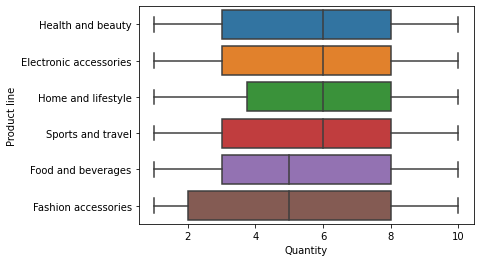

In [ ]:
sns.boxplot(x='Quantity',y='Product line',data=Sales) #making boxplot between Quantity and Product line

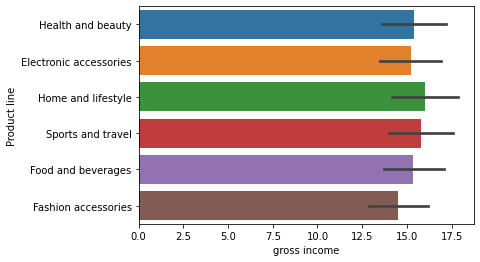

In [ ]:
sns.barplot(x='gross income',y='Product line',data=Sales)

**The rating for  'Food and bevarages' and 'Fasion accessories' is high but the quantity parchased by the customers is low, supply for these category need to be increased.**

**Gross income for 'Home and lifestyle' is high**

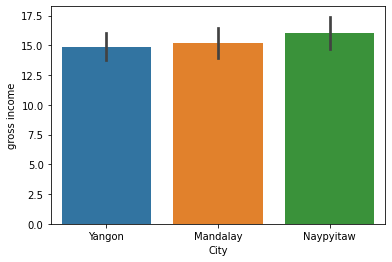

In [ ]:
#Which city should be chosen for expansion and what products should be focussed on?

sns.barplot(x='City',y='gross income',data=Sales) #making barplot between City and gross income

**The Naypytaw city has more gorss income, Expansion plan should be based on this city**

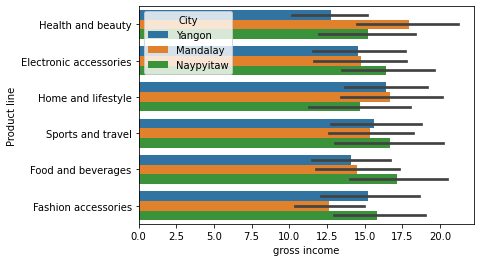

In [ ]:
sns.barplot(y='Product line',x='gross income',hue='City',data=Sales) #making barplot between Product line and City

**In Naypyitaw 'Fashion and beverages' and 'Sports and travel' has the highest income, these product should be on for expansion.**